In [453]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import random

In [454]:
legendary_name = ['Enamorus','Raikou','Calyrex','Kyurem','Regirock','Zeraora','Tapu Koko','Suicune','Terrakion','Nihilego','Diancie','Azelf','Arceus','Mew','Zapdos','Xurkitree','Jirachi','Mewtwo','Tornadus','Keldeo','Thundurus','Landorus','Cobalion','Mesprit','Zapdos Galarian Zapdos','Moltres Galarian Moltres','Zamazenta','Kartana','Magearna','Stakataka','Tapu Lele','Silvally','Cosmoem','Necrozma','Rayquaza','Regice','Volcanion','Zarude','Dialga','Regidrago','Solgaleo','Regieleki','Eternatus','Tapu Fini','Palkia','Lunala','Celebi','Pheromosa','Zacian','Xerneas','Hoopa','Reshiram','Genesect','Yveltal','Deoxys','Cresselia','Glastrier','Naganadel','Marshadow','Melmetal','Latios','Urshifu Rapid Strike Style','Buzzwole','Type: Null','Meloetta','Giratina','Virizion','Phione','Regigigas','Kyogre','Latias','Lugia','Entei','Blacephalon','Articuno Galarian Articuno','Victini','Spectrier','Shaymin','Ho-Oh','Celesteela','Uxie','Cosmog','Guzzlord','Articuno','Darkrai','Zekrom','Registeel','Groudon','Moltres','Tapu Bulu','Manaphy','Zygarde','Heatran','Miraidon','Koraidon','Chi-yu','Wo-chien','Ting-lu','Chien-pao','Iron Leaves','Walking Wake']

df_pokemon_all = pd.read_excel('pokemon_data.xlsx')

palavras_procuradas = ['Alolan', 'Galarian', 'Hisuian', 'Paldean']
regex = '|'.join(palavras_procuradas)
df_pokemon_regional = df_pokemon_all[df_pokemon_all['Name'].str.contains(regex, case=0, na=0, regex=True)]
df_pokemon_regional.reset_index(inplace=True, drop=True)

df_pokemon_all = df_pokemon_all.drop_duplicates(subset='Pokedex ID')
df_pokemon_all = pd.concat([df_pokemon_all, df_pokemon_regional])
df_pokemon_all.reset_index(inplace=True, drop=True)

In [455]:
df_pokemon_all['Is_legendary'] = 0

for i in legendary_name:
    df_pokemon_all.loc[df_pokemon_all['Name'].str.contains(i, case=0), 'Is_legendary'] = 1


In [456]:
df_not_legendary = df_pokemon_all.loc[df_pokemon_all['Is_legendary'] == 0]

In [457]:
not_legendary = list(df_not_legendary['Name'].sample(n=500, random_state=1))
for i in range(500):
    df_pokemon_all = df_pokemon_all.drop(df_pokemon_all[df_pokemon_all['Name'] == not_legendary[i]].index)

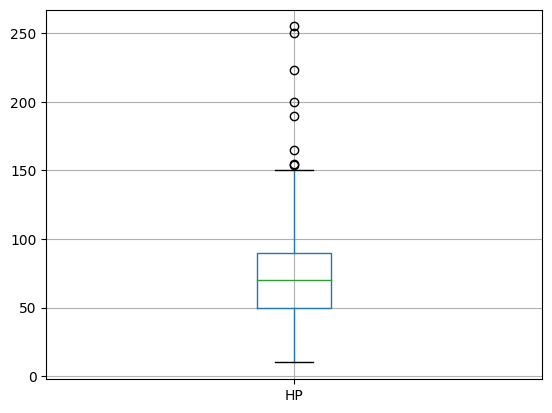

In [458]:
df_pokemon_all.boxplot(column='HP')
plt.show()

In [459]:
df_pokemon_all = df_pokemon_all.drop(df_pokemon_all[df_pokemon_all['HP'] >= 150].index)

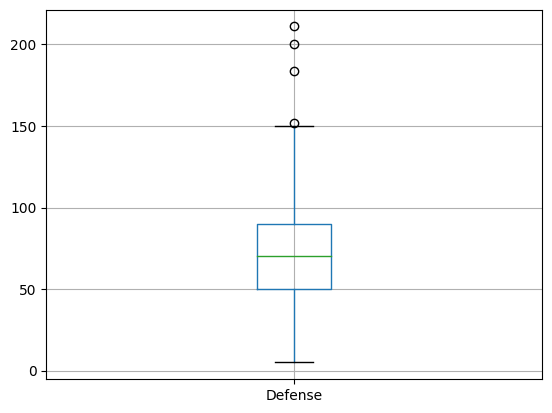

In [460]:
df_pokemon_all.boxplot(column='Defense')
plt.show()

In [461]:
df_pokemon_all = df_pokemon_all.drop(df_pokemon_all[df_pokemon_all['Defense'] >= 150].index)
df_pokemon_all.reset_index(drop=True, inplace=True)
df_pokemon_all.to_excel('pokemon_data_tratado.xlsx')

In [462]:
colunas = list(df_pokemon_all.columns)
colunas_sem_resposta = colunas.copy()
colunas_sem_resposta.pop(-1)
atributos = df_pokemon_all[colunas_sem_resposta].values
resposta = df_pokemon_all['Is_legendary'].values
print(len(resposta))

548


In [463]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [464]:
lista = list(df_pokemon_all.select_dtypes(include=['object']))
indices = [colunas_sem_resposta.index(i) for i in lista]
label_encoder = LabelEncoder()
for i in indices:
    atributos[:,i] = label_encoder.fit_transform(atributos[:, i])

In [465]:
label_encoder2 = LabelEncoder()
resposta = label_encoder2.fit_transform(resposta)

In [466]:
print(label_encoder2.classes_)

[0 1]


In [467]:
atributos_treino, atributos_teste, resposta_treino, resposta_teste = train_test_split(atributos, resposta, test_size=0.20, random_state=0)

In [468]:
classificador_bayes = GaussianNB()
classificador_bayes.fit(atributos_treino, resposta_treino)
classificacao = classificador_bayes.predict(atributos_teste)

In [469]:
taxa_acerto = accuracy_score(resposta_teste, classificacao)
print(taxa_acerto)

0.9


In [470]:
import pickle
import hmac
import hashlib

In [471]:
pickle.dumps(df_pokemon_all)

b'\x80\x04\x95"\xcd\x00\x00\x00\x00\x00\x00\x8c\x11pandas.core.frame\x94\x8c\tDataFrame\x94\x93\x94)\x81\x94}\x94(\x8c\x04_mgr\x94\x8c\x1epandas.core.internals.managers\x94\x8c\x0cBlockManager\x94\x93\x94\x8c\x16pandas._libs.internals\x94\x8c\x0f_unpickle_block\x94\x93\x94\x8c\x15numpy.core.multiarray\x94\x8c\x0c_reconstruct\x94\x93\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01K\tM$\x02\x86\x94h\x0f\x8c\x05dtype\x94\x93\x94\x8c\x02i8\x94\x89\x88\x87\x94R\x94(K\x03\x8c\x01<\x94NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00t\x94b\x89B \x9a\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x0b\x00\x00\x00\x00\x00\x00\x00\x10\x00\x00\x00\x00\x00\x00\x00\x13\x00\x00\x00\x00\x00\x00\x00\x15\x00\x00\x00\x00\x00\x00\x00\x16\x00\x00\x00\x00\x00\x00\x00\x17\x00\x00\x00\x00\x00\x00\x00\x19\x00\x00\x00\x00\x00\x00\x00\x1a\x00\x00\x00\x00\x00\x00\x00\x1b\x00\x00\x00\x00\x00\x00\x00\x1d\x00\x00\x00\x00\x00\x00\x00!\x00\x00\x00\x00\x00\x00

In [472]:
with open('dados.pickle', 'wb') as arquivo:
    pickle.dump(df_pokemon_all, arquivo)

In [4]:
def serializar_assinar(objeto, chave, arquivo):
    obj_serializado = pickle.dumps(objeto)
    assinatura = hmac.new(chave, obj_serializado, hashlib.sha256).digest()
    dados_assinados = obj_serializado + assinatura
    arquivo.write(dados_assinados)

chave = b'eiceratata'
